#### SUV Car Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("suv_data.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

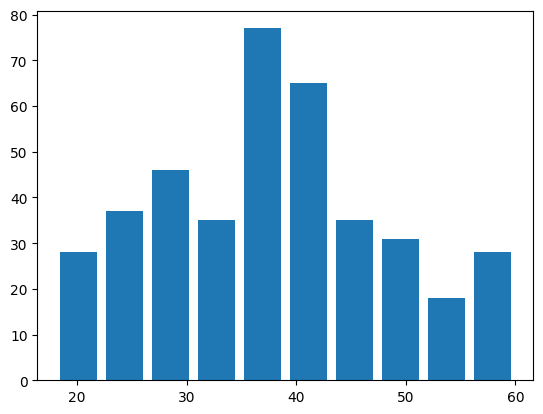

In [8]:
plt.hist(x=data['Age'],rwidth=0.8)

plt.show()

In [10]:
data['Purchased']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

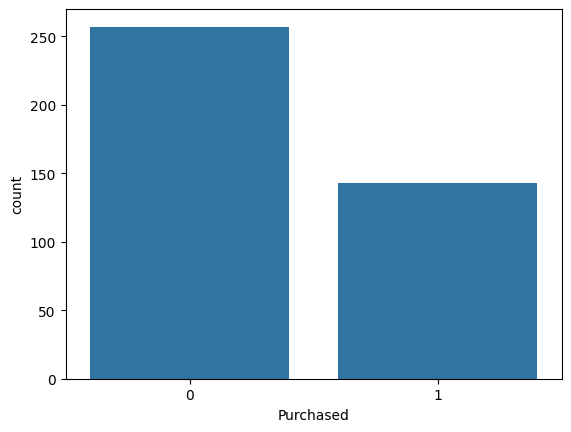

In [12]:
sns.countplot(x='Purchased',data=data)

<Axes: xlabel='Purchased', ylabel='count'>

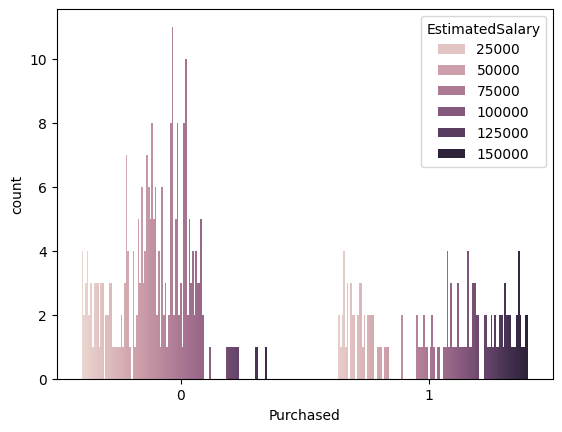

In [14]:
sns.countplot(x='Purchased',hue='EstimatedSalary',data=data)

<Axes: xlabel='Purchased', ylabel='count'>

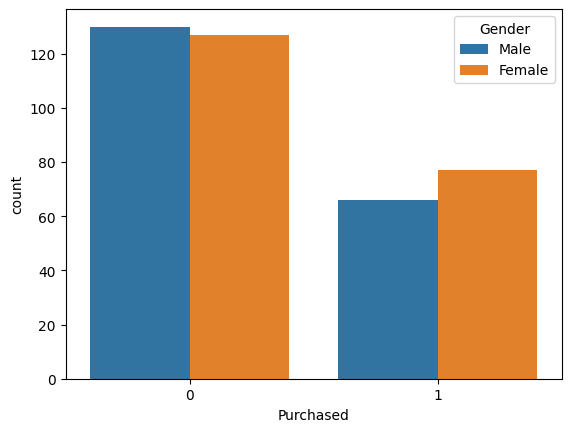

In [30]:
sns.countplot(x='Purchased',hue="Gender",data=data)

<Axes: xlabel='Purchased', ylabel='count'>

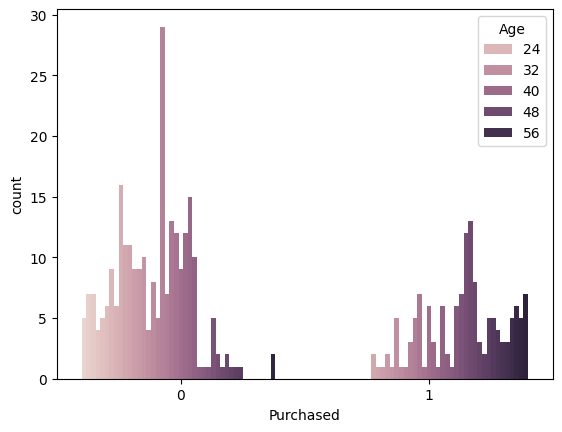

In [32]:
sns.countplot(x='Purchased',hue="Age",data=data)

(array([196.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 204.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

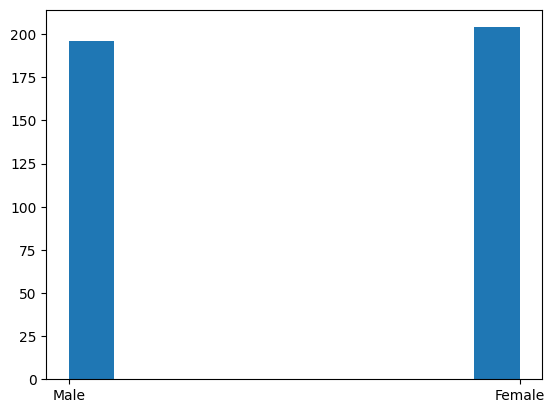

In [33]:
plt.hist(x=data["Gender"])

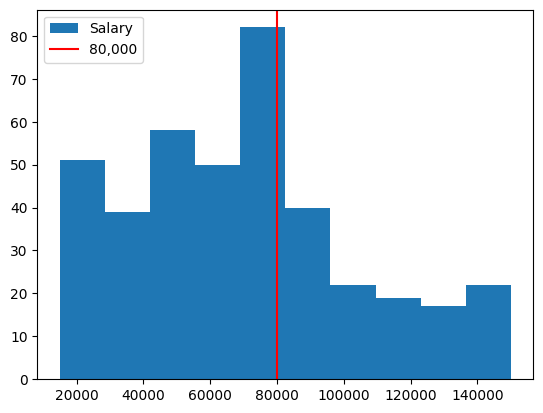

In [40]:
plt.hist(data['EstimatedSalary'],label="Salary")
plt.axvline(80000,label="80,000",color='r')
plt.legend(loc=2)
plt.show()

In [42]:
s=data['EstimatedSalary']==80000

In [43]:
s.sum()

np.int64(11)

In [44]:
data[s]

,User ID,Gender,Age,EstimatedSalary,Purchased
10,15570769,Female,26,80000,0
15,15697686,Male,29,80000,0
70,15756932,Male,25,80000,0
80,15595917,Male,30,80000,0
109,15697997,Female,38,80000,0
114,15739160,Male,42,80000,0
198,15745083,Male,26,80000,0
220,15789432,Female,41,80000,0
229,15721007,Female,42,80000,1
237,15753874,Female,37,80000,0


In [46]:
data2=data.sort_values(by='Age')

In [48]:
data2=data2.sort_values(by="User ID")

In [49]:
data2

,User ID,Gender,Age,EstimatedSalary,Purchased
294,15566689,Female,35,57000,0
258,15569641,Female,58,95000,1
10,15570769,Female,26,80000,0
171,15570932,Male,34,115000,0
187,15571059,Female,33,41000,0
...,...,...,...,...,...
232,15813113,Male,40,107000,1
60,15814004,Male,27,20000,0
334,15814553,Male,57,60000,1
185,15814816,Male,31,66000,0


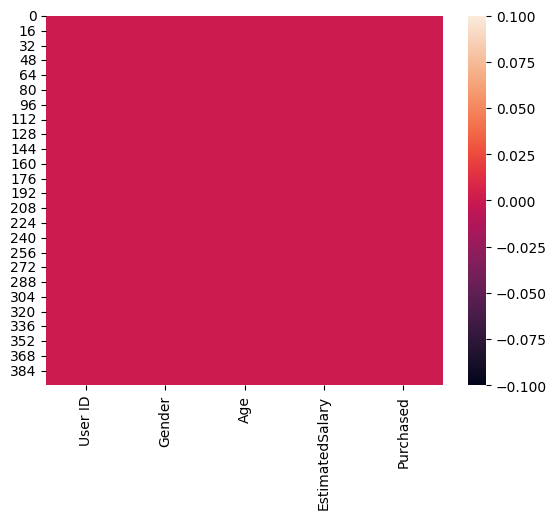

In [54]:
sns.heatmap(data.isnull())

In [55]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<Axes: xlabel='Purchased', ylabel='Age'>

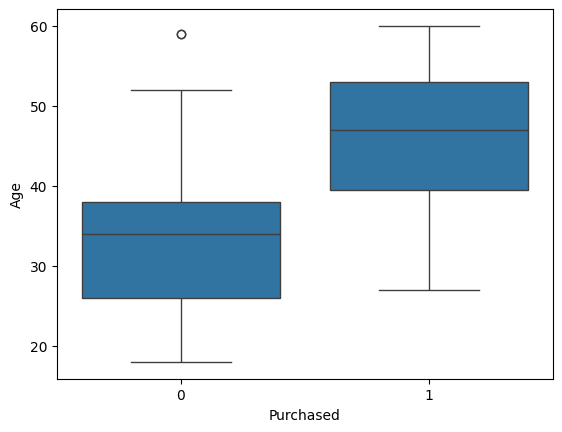

In [58]:
sns.boxplot(x=data['Purchased'],y=data['Age'])

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

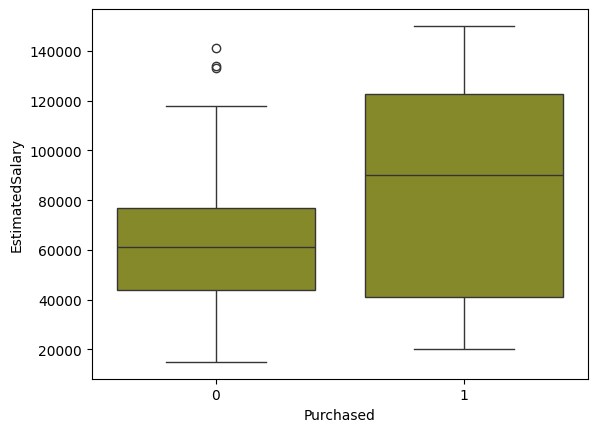

In [63]:
sns.boxplot(x=data['Purchased'],y=data['EstimatedSalary'],color='#959919')

#### Define dependent and independent variable

In [76]:
x=data.iloc[:,[2,3]]
y=data.iloc[:,4]
print(x,y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns] 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
sc=StandardScaler()

In [104]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
classifier=LogisticRegression()

In [107]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [108]:
prediction=classifier.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
Accuraccy_score=accuracy_score(Y_test,prediction)*100

In [111]:
print(Accuraccy_score)

82.5


In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
cm=confusion_matrix(Y_test,prediction)

In [114]:
print(cm)

[[65  7]
 [14 34]]
